# 7 Days of code - Alura
# Autor: Guilherme Barros

## Data Cleaning - Dataset Ceaps
disponível em: Disponivel em: https://mail.google.com/mail/u/0/#inbox/FMfcgzGmvpJTqhzWnbDPjqLWkshhwBjt

## Passo a passo para limpar o dataset do CEAPS
1. Importar os dados e juntar os datasets de anos diferentes em um único dataframe
2. Arrumar a coluna VALOR_REEMBOLSADO, trocando as virgulas usadas no separador de decimal para o ponto e convertendo a coluna para o tipo float
3. Converter a coluna DATA para o tipo data, ver os index com problemas, consertar manualmente as linhas com problema e converter tudo para o tipo correto da coluna
4. Avaliando sem tem CPF/CNPJ no formato incorreto
5. Colocar os valores S/N na coluna documento com o valor NaN

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import math

## Carregando a base de dados

In [2]:
files = glob.glob('*.csv')
df = pd.DataFrame()
for file in files:
    if df.empty:
        df = pd.read_csv(file, sep=';', encoding='latin1', header=1)
    else:
        df = pd.concat([df, pd.read_csv(file, sep=';', encoding='latin1', header=1)])
df = df.reset_index(drop=True)
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008091e+12
1,2008,9,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"386,6",2.008091e+12
2,2008,10,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008101e+12
3,2008,10,ADA MELLO,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,NaN,NaN,"2610,68",2.008101e+12
4,2008,11,ADA MELLO,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,NaN,NaN,"12351,52",2.008111e+12


In [3]:
index_com_problema = []
for i, row in df.iterrows():
    try:
        float(row['VALOR_REEMBOLSADO'].replace('.', '').replace(',', '.'))
    except:
        index_com_problema.append(i)
index_com_problema

[115962]

In [4]:
df.loc[[index_com_problema[0]]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
115962,2013,2,RICARDO FERRAÇO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,9572462859757,04/02/2013,CNPJ: 02.012.862/0001-60 FORNECEDOR: TAM DOCUM...,"1\r\n675,55",698982.0


In [5]:
df.loc[index_com_problema[0], 'VALOR_REEMBOLSADO'] = '1675,55'
df.loc[[index_com_problema[0]]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
115962,2013,2,RICARDO FERRAÇO,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM,9572462859757,04/02/2013,CNPJ: 02.012.862/0001-60 FORNECEDOR: TAM DOCUM...,"1675,55",698982.0


In [6]:
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))

In [7]:
df.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             23876
DATA                   3144
DETALHAMENTO         129601
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

In [8]:
def completa_datas_faltando(row):
    if not isinstance(row['DATA'], str):
        if math.isnan(row['DATA']):
            return f'01/{row["MES"]}/{row["ANO"]}'
    else:
        return row['DATA']

In [9]:
df['DATA'] = df.apply(completa_datas_faltando, axis=1)

In [10]:
temp = pd.to_datetime(df['DATA'], format='%d/%m/%Y', errors = 'coerce')
df[temp.isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
150213,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"SEM FATURA"";02/08/2015""","Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...","469,53",2014675.00,NaN
150220,2015,8,EDUARDO AMORIM,"Passagens aéreas, aquáticas e terrestres nacio...",13.353.495/0001-84,PROPAGTUR - Propag Turismo Ltda,"¨¨SEM FATURA"";17/08/2015""","Companhia Aérea: AVIANCA, Localizador: ZNEU9F....","460,45",2016557.00,NaN
154649,2015,10,JOÃO ALBERTO SOUZA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS E TURISMO LTDA,NaN,06/10/2915,"Companhia Aérea: GOL, Localizador: HF2VJM. Pas...",993.46,2029364.0
156117,2015,8,JOSÉ AGRIPINO,Serviços de Segurança Privada,10.209.529/0001-73,Branco Oliveira Limpeza e Conservação Ltda.,034,26/08/0201,NaN,4029.11,2016913.0
156470,2015,4,JOSÉ MEDEIROS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ADRIA VIAGENS,NaN,24/02/5015,"Companhia Aérea: AVIANCA, Localizador: 42BZ8L....",821.25,2011103.0
162852,2015,4,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",02.012.862/0001-60,TAM Linhas Aéreas S.A,XGUHHW,22/04/0215,"Companhia Aérea: TAM, Localizador: XGUHHW. Pas...",853.93,2008125.0
162856,2015,4,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,VRG Linhas Aereas S.A.,THIEUG,23/04/0215,"Companhia Aérea: GOL, Localizador: THIEUG. Pas...",813.93,2008124.0
167257,2015,5,TELMÁRIO MOTA,"Passagens aéreas, aquáticas e terrestres nacio...",12.795.601/0001-17,GLOBAL VIAGENS EVENTOS E TURISMO,010/15,08/05/5201,"Companhia Aérea: TAM, Localizador: 5MHYZ3. Pas...",2659.35,2007486.0
172538,2016,10,ARMANDO MONTEIRO,"Aluguel de imóveis para escritório político, c...",41.054.867/0001-07,Jadan Office Center,1101610021,20/07/5017,"Taxa de condomínio do escritório parlamentar, ...",811.89,2050224.0
182785,2016,4,JOSÉ MEDEIROS,"Locomoção, hospedagem, alimentação, combustíve...",12.262.251/0001-23,HOTEL GRAN ODARA LTDA,65509,02/04/3016,despesa com hospedagem,259.90,2034257.0


In [11]:
# Corrigindo manualmente os datas com problema
df.loc[150213, 'DETALHAMENTO'] = df.loc[150213, 'DATA']
df.loc[150213, 'DATA'] = '02/08/2015'
df.loc[150213, 'VALOR_REEMBOLSADO'] = 469.53
df.loc[150213, 'COD_DOCUMENTO'] = '2014675'
df.loc[150220, 'DETALHAMENTO'] = df.loc[150220, 'DATA']
df.loc[150220, 'DATA'] = '17/08/2015'
df.loc[150220, 'VALOR_REEMBOLSADO'] = 460.45
df.loc[150220, 'COD_DOCUMENTO'] = '2016557'
df.loc[154649, 'DATA'] = '06/10/2015'
df.loc[156117, 'DATA'] = '28/08/2015'
df.loc[156470, 'DATA'] = '24/04/2015'
df.loc[162852, 'DATA'] = '22/04/2015'
df.loc[162856, 'DATA'] = '23/04/2015'
df.loc[167257, 'DATA'] = '08/05/2015'
df.loc[172538, 'DATA'] = '20/10/2016'
df.loc[182785, 'DATA'] = '02/04/2016'
df.loc[183965, 'DATA'] = '20/10/2016'
df.loc[183965, 'DATA'] = '02/04/2016'
df.loc[184080, 'DATA'] = '04/04/2016'
df.loc[188325, 'DATA'] = '31/10/2016'
df.loc[203728, 'DATA'] = '31/10/2016'
df.loc[212862, 'DATA'] = '30/11/2017'
df.loc[213093, 'DATA'] = '09/11/2017'
df.loc[215642, 'DATA'] = '02/03/2017'
df.loc[223560, 'DATA'] = '13/03/2017'
df.loc[238079, 'DATA'] = '09/03/2018'
df.loc[240697, 'DATA'] = '16/11/2018'
df.loc[259616, 'DATA'] = '31/01/2019'
df.loc[280626, 'DATA'] = '05/05/2020'
df.loc[286500, 'DATA'] = '29/10/2021'

In [12]:
df[df['DATA'].isna()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO


In [13]:
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y', errors = 'coerce')
df.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
COD_DOCUMENTO                object
dtype: object

In [14]:
df[df['DATA'].isna()]['DATA']

Series([], Name: DATA, dtype: datetime64[ns])

In [15]:
df.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             23876
DATA                      0
DETALHAMENTO         129601
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             0
dtype: int64

In [16]:
for column in df.columns:
    print(df[column].value_counts(dropna=False))
    print()

2012    30175
2013    29376
2017    27023
2016    26768
2015    26056
2011    25574
2018    24492
2014    22002
2019    21634
2010    18235
2021    16808
2009    16480
2020    14090
2008     2449
Name: ANO, dtype: int64

5     27822
8     27339
6     27223
4     26467
10    26391
11    26296
3     26253
9     25549
7     25503
12    23214
2     22302
1     16803
Name: MES, dtype: int64

PAULO PAIM         8411
HUMBERTO COSTA     7734
PAULO BAUER        6384
LÍDICE DA MATA     5730
JOÃO CAPIBERIBE    5503
                   ... 
ADA MELLO             8
CARLOS DUNGA          5
SIQUEIRA CAMPOS       4
GILBERTO PISELO       3
NAILDE PANTA          1
Name: SENADOR, Length: 277, dtype: int64

Locomoção, hospedagem, alimentação, combustíveis e lubrificantes                                                                                                                                   126286
Passagens aéreas, aquáticas e terrestres nacionais                                                    

In [19]:
def uniformizar_documentos_irregulares(x):
    if isinstance(x, str):
        if x.lower() == 's/n':
            return float('NaN')
        elif x.lower() == 's/nº':
            return float('NaN')
        elif x.lower() == 'sn':
            return float('NaN')
        elif x.lower() == 's / n':
            return float('NaN')
        elif x.lower() == '-':
            return float('NaN')
        else:
            return x
    else:
        return x
    
df['DOCUMENTO'] = df['DOCUMENTO'].apply(uniformizar_documentos_irregulares)

In [20]:
df['DOCUMENTO'].value_counts(dropna=False)[:10]

NaN    28625
0        655
01       124
10       104
11       102
00        95
12        90
5         86
24        84
13        78
Name: DOCUMENTO, dtype: int64

In [21]:
df['SENADOR'] = df['SENADOR'].apply(lambda x: x.title().strip())

In [22]:
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2008,9,Ada Mello,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,2008-09-01,NaN,12351.52,2008090814004.0
1,2008,9,Ada Mello,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,2008-09-01,NaN,386.60,2008090814003.0
2,2008,10,Ada Mello,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,2008-10-01,NaN,12351.52,2008100814004.0
3,2008,10,Ada Mello,"Locomoção, hospedagem, alimentação, combustíve...",NaN,NaN,NaN,2008-10-01,NaN,2610.68,2008100814003.0
4,2008,11,Ada Mello,"Contratação de consultorias, assessorias, pesq...",NaN,NaN,NaN,2008-11-01,NaN,12351.52,2008110814004.0


In [29]:
for i in df['CNPJ_CPF']:
    if isinstance(i ,str):    
        if not (len(i) == 18 or len(i) == 14):
            print(i)

In [30]:
df.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             28625
DATA                      0
DETALHAMENTO         129601
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             0
dtype: int64

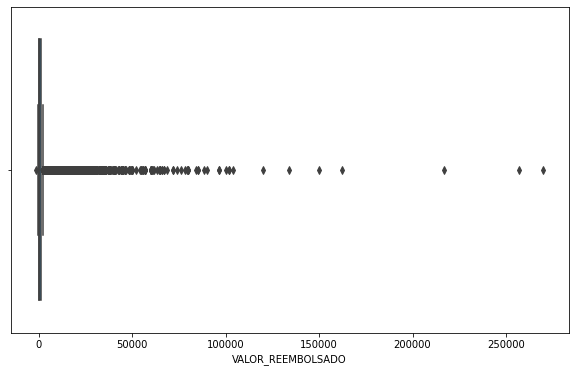

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='VALOR_REEMBOLSADO', data=df, ax=ax)

plt.show()

In [35]:
df.query('VALOR_REEMBOLSADO > 100000')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
137490,2014,11,Mozarildo Cavalcanti,"Contratação de consultorias, assessorias, pesq...",01.736.567/0001-93,Audioshopp - Comunicações & Multimidia Eireli ...,00000302,2014-11-07,Despesas com serviços técnicos especializados.,150000.0,967066.0
139114,2014,12,Paulo Paim,Divulgação da atividade parlamentar,07.053.387/0001-93,Algo Mais Artes Gráficas e Editora Ltda,12786,2014-12-17,"Impressão de 800 mil informativos, 30 mil esta...",162400.0,985752.0
148723,2015,12,Davi Alcolumbre,Divulgação da atividade parlamentar,38.006.631/0001-90,Gráfica e Editora Paranaíba Ltda - ME,242,2016-03-29,NaN,216780.0,2033251.0
166437,2015,12,Rose De Freitas,Divulgação da atividade parlamentar,28.130.334/0001-07,Gráfica Samorini Ltda Epp,269,2016-03-29,NaN,134100.0,2033309.0
174982,2016,12,Davi Alcolumbre,Divulgação da atividade parlamentar,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0,2061547.0
201831,2017,12,Davi Alcolumbre,Divulgação da atividade parlamentar,29.337.655/0001-31,Start print Comunicação Visual Eireli,36,2018-03-15,NaN,270000.0,2090997.0
245363,2018,12,Rose De Freitas,Divulgação da atividade parlamentar,05.461.408/0001-84,Grafitusa S/A,000009681,2019-03-29,NaN,103900.0,2118038.0
245626,2018,11,Sérgio Petecão,"Contratação de consultorias, assessorias, pesq...",22.233.033/0001-14,Reis Grafica e Comercio de Etiquetas Eireli ME,4193,2018-11-29,NaN,102000.0,2111449.0
245629,2018,12,Sérgio Petecão,"Contratação de consultorias, assessorias, pesq...",22.233.033/0001-14,Reis Grafica e Comercio de Etiquetas Eireli ME,000004252,2018-12-17,NaN,102000.0,2115868.0
283526,2020,12,Wellington Fagundes,"Contratação de consultorias, assessorias, pesq...",23.721.017/0001-33,"T2 Comunicação, Video e Produções Eireli - EPP",000.000.765,2020-12-21,Despesa com serviço de consultoria e assessori...,120000.0,2153883.0


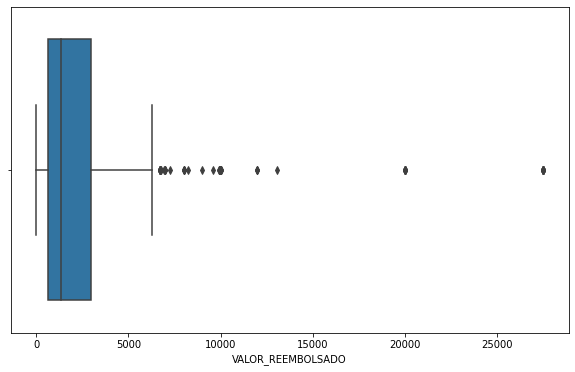

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(x='VALOR_REEMBOLSADO', data=df.query('SENADOR == "Davi Alcolumbre" and VALOR_REEMBOLSADO <= 50000'), ax=ax)

plt.show()

In [40]:
df.to_csv('despesas_ceaps_2008_2021.csv', sep=';', index=False)

In [42]:
pd.read_csv('despesas_ceaps_2008_2021.csv', sep=';').tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
301157,2021,12,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,GDAONA,2021-12-01,"Companhia Aérea: GOL, Localizador: GDAONA. Pas...",1715.45,2170983.0
301158,2021,12,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,JFQVZP,2021-12-15,"Companhia Aérea: LATAM, Localizador: JFQVZP. P...",2489.29,2172263.0
301159,2021,12,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SSKEOB,2021-12-17,"Companhia Aérea: GOL, Localizador: SSKEOB. Pas...",1486.66,2172717.0
301160,2021,12,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,ZICCEX,2021-12-27,"Companhia Aérea: LATAM, Localizador: ZICCEX. P...",2515.56,2173239.0
301161,2021,12,Zequinha Marinho,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,LM6FSK,2021-12-29,"Companhia Aérea: AZUL, Localizador: LM6FSK. Pa...",1510.75,2173238.0


In [43]:
df.shape

(301162, 11)